In [122]:
import openmc
import numpy as np
import matplotlib.pyplot as plt

In [112]:

###############################################################################
#                      Simulation Input File Parameters
###############################################################################

# OpenMC simulation parameters
batches = 20
inactive = 2
particles = 10000





In [113]:

###############################################################################
#                 Exporting to OpenMC materials.xml file
###############################################################################


# Instantiate some Materials and register the appropriate Nuclides
uo2 = openmc.Material(material_id=1, name='UO2 fuel at 2.4% wt enrichment')
uo2.set_density('g/cm3', 10.29769)
uo2.add_element('U', 1., enrichment=2.4)
uo2.add_element('O', 2.)

helium = openmc.Material(material_id=2, name='Helium for gap')
helium.set_density('g/cm3', 0.001598)
helium.add_element('He', 2.4044e-4)

zircaloy = openmc.Material(material_id=3, name='Zircaloy 4')
zircaloy.set_density('g/cm3', 6.55)
zircaloy.add_element('Sn', 0.014  , 'wo')
zircaloy.add_element('Fe', 0.00165, 'wo')
zircaloy.add_element('Cr', 0.001  , 'wo')
zircaloy.add_element('Zr', 0.98335, 'wo')

borated_water = openmc.Material(material_id=4, name='Borated water')
borated_water.set_density('g/cm3', 0.740582)
borated_water.add_element('B', 4.0e-5)
borated_water.add_element('H', 5.0e-2)
borated_water.add_element('O', 2.4e-2)
borated_water.add_s_alpha_beta('c_H_in_H2O')

heavy_water = openmc.Material(material_id = 5,name='heavy water')
heavy_water.add_nuclide('H2', 2.0)
heavy_water.add_nuclide('O16', 1.0)
heavy_water.add_s_alpha_beta('c_D_in_D2O')
heavy_water.set_density('g/cm3', 1.1)

# Instantiate a Materials collection and export to XML
materials_file = openmc.Materials([uo2, helium, zircaloy, borated_water,heavy_water])
materials_file.export_to_xml()




/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)


In [114]:
###############################################################################
#                 Exporting to OpenMC geometry.xml file
###############################################################################

# Instantiate ZCylinder surfaces
fuel_or = openmc.ZCylinder(surface_id=1, x0=0, y0=0, r=0.39218/2, name='Fuel OR')
clad_ir = openmc.ZCylinder(surface_id=2, x0=0, y0=0, r=0.40005/2, name='Clad IR')
clad_or = openmc.ZCylinder(surface_id=3, x0=0, y0=0, r=0.45720/2, name='Clad OR')
left = openmc.XPlane(surface_id=4, x0=-0.62992, name='left')
right = openmc.XPlane(surface_id=5, x0=0.62992, name='right')
bottom = openmc.YPlane(surface_id=6, y0=-0.62992, name='bottom')
top = openmc.YPlane(surface_id=7, y0=0.62992, name='top')

left.boundary_type = 'reflective'
right.boundary_type = 'reflective'
top.boundary_type = 'reflective'
bottom.boundary_type = 'reflective'

# Instantiate Cells
fuel = openmc.Cell(cell_id=1, name='cell 1')
gap = openmc.Cell(cell_id=2, name='cell 2')
clad = openmc.Cell(cell_id=3, name='cell 3')
water = openmc.Cell(cell_id=4, name='cell 4')

# Use surface half-spaces to define regions
fuel.region = -fuel_or
gap.region = +fuel_or & -clad_ir
clad.region = +clad_ir & -clad_or
water.region = +clad_or & +left & -right & +bottom & -top

# Register Materials with Cells
fuel.fill = uo2
gap.fill = helium
clad.fill = zircaloy
water.fill = heavy_water #borated_water

# Instantiate Universe
root = openmc.Universe(universe_id=0, name='root universe')

# Register Cells with Universe
root.add_cells([fuel, gap, clad, water])

# Instantiate a Geometry, register the root Universe, and export to XML
geometry = openmc.Geometry(root)
geometry.export_to_xml()




/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Surface instance already exists with id=1.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Surface instance already exists with id=2.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Surface instance already exists with id=3.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Surface instance already exists with id=4.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Surface instance already exists with id=5.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Surface instance already exists with id=6.
  warn(msg, IDWarning)
/Users/SindreKaald/min

In [115]:
###############################################################################
#                   Exporting to OpenMC settings.xml file
###############################################################################

# Instantiate a Settings object, set all runtime parameters, and export to XML
settings_file = openmc.Settings()
settings_file.batches = batches
settings_file.inactive = inactive
settings_file.particles = particles

# Create an initial uniform spatial source distribution over fissionable zones
bounds = [-0.62992, -0.62992, -1, 0.62992, 0.62992, 1]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
settings_file.source = openmc.source.Source(space=uniform_dist)

entropy_mesh = openmc.RegularMesh()
entropy_mesh.lower_left = [-0.39218, -0.39218, -1.e50]
entropy_mesh.upper_right = [0.39218, 0.39218, 1.e50]
entropy_mesh.dimension = [10, 10, 1]
settings_file.entropy_mesh = entropy_mesh
settings_file.export_to_xml()



In [116]:

###############################################################################
#                   Exporting to OpenMC tallies.xml file
###############################################################################

# Instantiate a tally mesh
mesh = openmc.RegularMesh()
mesh.dimension = [1, 1, 1]
mesh.lower_left = [-0.62992, -0.62992, -1.e50]
mesh.upper_right = [0.62992, 0.62992, 1.e50]

# Instantiate some tally Filters
bins = np.logspace(-3,7,50)
energy_filter = openmc.EnergyFilter(bins)
mesh_filter = openmc.MeshFilter(mesh)

material_filter = openmc.MaterialFilter([heavy_water,uo2], filter_id=1)

# Instantiate the Tally
tally = openmc.Tally(tally_id=1, name='tally 1')
tally.filters = [mesh_filter,energy_filter]
tally.scores = ['flux', 'fission']#, 'nu-fission']

tally_2  = openmc.Tally(tally_id=3, name='tally 3')
tally_2.filters = [energy_filter]#, material_filter]
tally_2.scores = ['flux']#, 'nu-fission']

# Instantiate a Tallies collection and export to XML
tallies_file = openmc.Tallies([tally,tally_2])
tallies_file.export_to_xml()

/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Filter instance already exists with id=1.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Tally instance already exists with id=1.
  warn(msg, IDWarning)
/Users/SindreKaald/miniconda3/lib/python3.7/site-packages/openmc/mixin.py:71: IDWarning: Another Tally instance already exists with id=3.
  warn(msg, IDWarning)


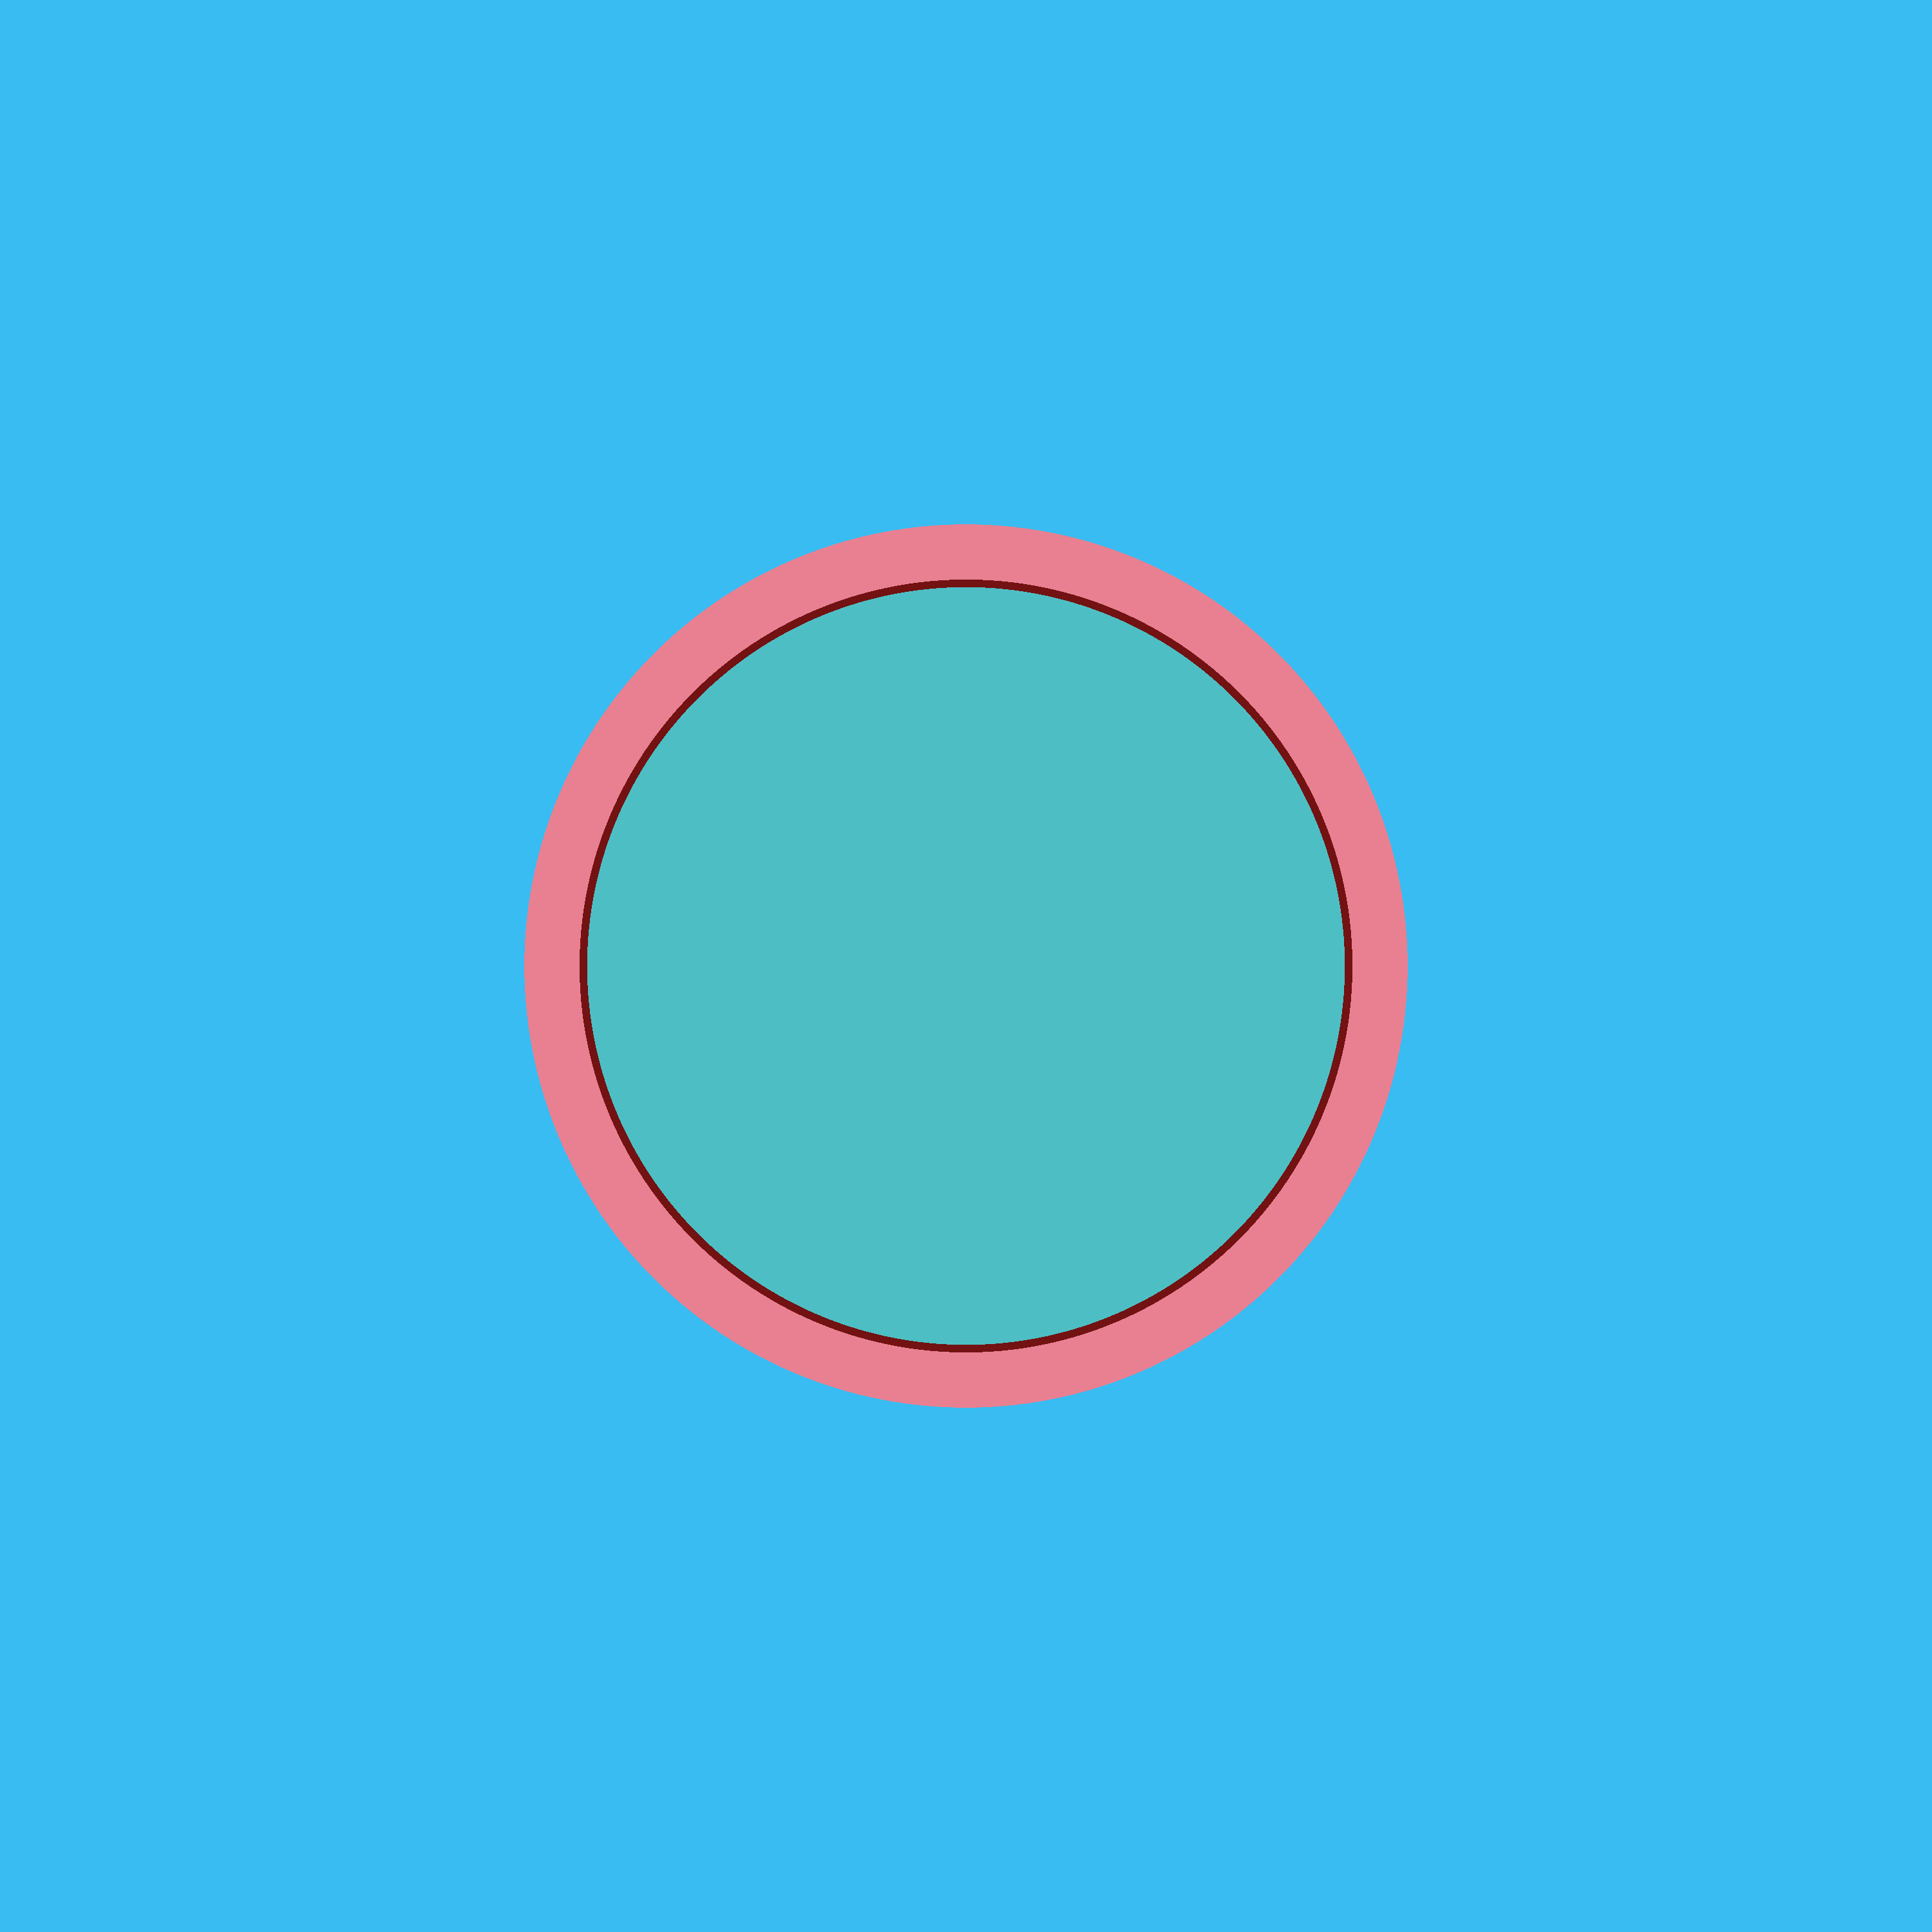

In [117]:
plot1 = openmc.Plot()
plot1.filename = 'materials-xy'
plot1.origin = [0, 0, 0]
plot1.basis = 'xy'
plot1.width = [1.0, 1.0]
plot1.pixels = [3000, 3000]
plot1.color = "material"

# Plot inline in jupyter or QtConsole
openmc.plot_inline(plot1)

In [119]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

Tally
	ID             =	7
	Name           =	tally 3
	Filters        =	EnergyFilter
	Nuclides       =	total 
	Scores         =	['flux']
	Estimator      =	tracklength

[[[0.0183128 ]]

 [[0.03580669]]

 [[0.09422118]]

 [[0.24740116]]

 [[0.5964557 ]]

 [[1.28167454]]

 [[2.6401794 ]]

 [[4.58095385]]

 [[6.29765092]]

 [[6.32788924]]

 [[4.59802385]]

 [[3.13070886]]

 [[2.61799819]]

 [[2.39166748]]

 [[2.25099173]]

 [[2.17654673]]

 [[2.11980719]]

 [[2.06301545]]

 [[1.85562866]]

 [[2.21367468]]

 [[2.23790263]]

 [[2.24128692]]

 [[2.35279891]]

 [[2.47649073]]

 [[2.49062955]]

 [[2.59665897]]

 [[2.60418135]]

 [[2.68139959]]

 [[2.68554045]]

 [[2.72958514]]

 [[2.76462786]]

 [[2.77486467]]

 [[2.79263091]]

 [[2.81705077]]

 [[2.82483118]]

 [[2.81546575]]

 [[2.82224391]]

 [[2.79479191]]

 [[2.77383858]]

 [[2.75359169]]

 [[2.70011055]]

 [[2.67666103]]

 [[2.05106763]]

 [[2.44995473]]

 [[2.18037589]]

 [[2.56888902]]

 [[2.19862574]]

 [[1.13402848]]

 [[0.25470382]]]


ValueError: x and y must have same first dimension, but have shapes (50,) and (49,)

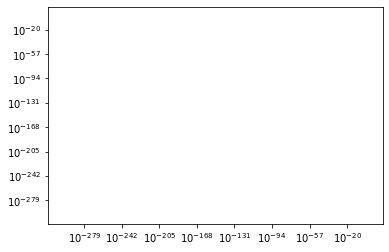

In [124]:
# Load the statepoint file
sp = openmc.StatePoint('statepoint.20.h5')


tally = sp.get_tally(name = 'tally 3')
flux = tally.get_slice(scores=['flux'])
print(flux)
print(flux.mean)
#sp.source['flux']

bins = np.logspace(-3,7,50) #Must be the same for the specified tallies
plt.loglog(bins,flux.mean[:,0,0])
plt.xlabel('eV')
plt.ylabel('Flux ()')
